In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


This is to create Data for Processing

In [4]:
import numpy as np
import pandas as pd

np.random.seed(42)

n = 1200

df = pd.DataFrame({
    "Monthly_Amount": np.random.gamma(2, 2500, n),
    "Txn_Count": np.random.poisson(18, n),
    "Avg_Ticket": np.random.normal(1500, 400, n).clip(200),
    "Dormancy_Days": np.random.exponential(25, n)
})

df.to_csv("data/customer_regime_data.csv", index=False)
df.head()


,Monthly_Amount,Txn_Count,Avg_Ticket,Dormancy_Days
0,5984.198475,20,1478.757279,9.667758
1,3736.161826,19,1279.607279,83.047651
2,3455.708961,22,1567.206136,25.651223
3,3455.755736,16,1878.084614,0.592797
4,11624.286031,15,1700.332636,14.060689


In [5]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("data/customer_regime_data.csv")

features = ['Monthly_Amount','Txn_Count','Avg_Ticket','Dormancy_Days']
X = df[features].values

scaler = StandardScaler()
Xs = scaler.fit_transform(X)


In [6]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=2, random_state=42)
Z = fa.fit_transform(Xs)

Z[:5]


array([[-0.0067967 , -0.16795723],
       [-0.23405866,  0.42421441],
       [-0.2797008 , -0.04887272],
       [ 0.01393008, -0.0545236 ],
       [ 0.53777328, -0.05773593]])

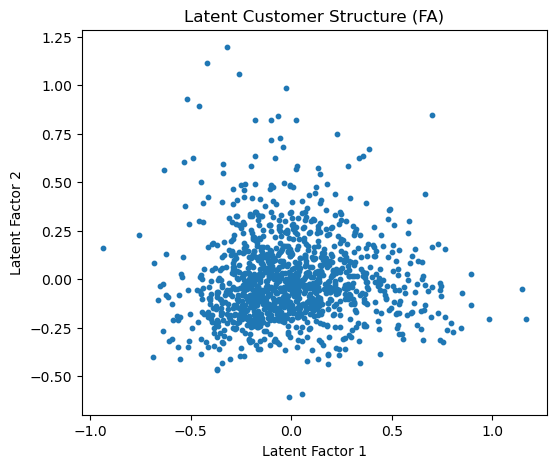

In [7]:
plt.figure(figsize=(6,5))
plt.scatter(Z[:,0], Z[:,1], s=10)
plt.title("Latent Customer Structure (FA)")
plt.xlabel("Latent Factor 1")
plt.ylabel("Latent Factor 2")
plt.show()


In [8]:
pd.DataFrame(
    fa.components_,
    columns=features,
    index=["Latent_Factor_1","Latent_Factor_2"]
).T


,Latent_Factor_1,Latent_Factor_2
Monthly_Amount,0.217749,-0.045257
Txn_Count,-0.185409,-0.102537
Avg_Ticket,-0.012309,0.054173
Dormancy_Days,-0.046476,0.184088


In [9]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
regimes = gmm.fit_predict(Z)

df["Regime"] = regimes
df["LF1"] = Z[:,0]
df["LF2"] = Z[:,1]


C:\Users\98412\miniconda3\envs\ai_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [10]:
df.head

<bound method NDFrame.head of       Monthly_Amount  Txn_Count   Avg_Ticket  Dormancy_Days  Regime       LF1  \
0        5984.198475         20  1478.757279       9.667758       1 -0.006797   
1        3736.161826         19  1279.607279      83.047651       0 -0.234059   
2        3455.708961         22  1567.206136      25.651223       1 -0.279701   
3        3455.755736         16  1878.084614       0.592797       1  0.013930   
4       11624.286031         15  1700.332636      14.060689       2  0.537773   
...              ...        ...          ...            ...     ...       ...   
1195      795.145142         14  1258.464681       7.280977       1 -0.058929   
1196     4234.441709         23  1320.815465      14.351998       1 -0.246231   
1197     4956.483704         20  1014.077546      18.358645       1 -0.072824   
1198     1279.321320         20   616.687690       8.736495       1 -0.269073   
1199     2477.159108         20  1407.765441       0.384564       1 -0.202617  

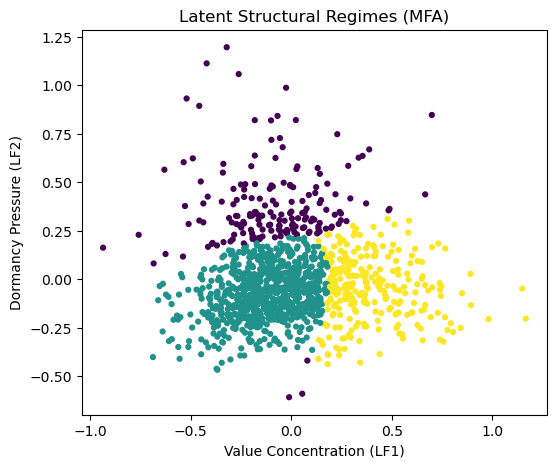

In [11]:
plt.figure(figsize=(6,5))
plt.scatter(df["LF1"], df["LF2"], c=df["Regime"], s=12)
plt.title("Latent Structural Regimes (MFA)")
plt.xlabel("Value Concentration (LF1)")
plt.ylabel("Dormancy Pressure (LF2)")
plt.show()


In [12]:
df.groupby("Regime")[features].mean().round(1)

,Monthly_Amount,Txn_Count,Avg_Ticket,Dormancy_Days
Regime,,,,
0,4187.9,16.8,1597.7,64.9
1,3809.4,19.2,1483.0,16.0
2,9254.7,15.1,1449.3,16.1
